In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import sympy

---
# Распределения случайных величин
---

### Задача.

---

Три стрелка осуществляют по 1 выстрелу по мишени. Вероятности поразить мишень для каждого стрелка соответственно равны $p_1=0.6$, $p_2=0.7$, $p_3=0.8$. Выстрелы производятся независимо друг от друга. Составить функцию распределения случайной величины $\xi$, показывающей количество попаданий по мишени.

---


$$P(\xi=0)=(1 - p_1)\cdot(1 - p_2)\cdot(1 - p_3)$$

$$P(\xi=1)=p_1\cdot(1-p_2)\cdot(1-p_3)+(1-p_1)\cdot p_2\cdot(1-p_3)+(1-p_1)\cdot(1-p_2)\cdot p_3$$

$$P(\xi=2)=p_1\cdot p_2\cdot (1 - p_3)+ p_1\cdot (1 - p_2)\cdot p_3 + (1-p_1)\cdot p_2\cdot p_3$$

$$P(\xi=3)=p_1\cdot p_2\cdot p_3$$

$$
F_\xi(x)=\begin{cases}
0 \quad & x\leq 0 \\
P(\xi=0) & 0 < x \leq 1 \\
P(\xi=0) + P(\xi=1) & 1 < x \leq 2 \\
P(\xi=0) + P(\xi=1) + P(\xi=2) & 2 < x \leq 3 \\
P(\xi=0) + P(\xi=1) + P(\xi=2) + P(\xi=3)\quad & x > 3 \\
\end{cases}
$$

---

In [ ]:
p_list, t = [0.6, 0.7, 0.8], 1000000
experiment = np.array([np.random.choice([0, 1], t, p=[1 - p_i, p_i]) for p_i in p_list])

for i in range(0, 4):
    count_i = np.array(experiment.sum(axis=0) == i).sum()
    print(f'{i} : {count_i / t}')

0 : 0.0239
1 : 0.188331
2 : 0.45141
3 : 0.336359


### Задача.

---

Один известный футболист очень любит устраивать челленджи с различными вратарями на пробитие серии из 5 пенальти. Исходя из статистики реализованных и нереализованных пенальти этого футболиста можно заключить, что вероятность успеха (то есть вероятность забить гол в одном пенальти) для него составляет 0.71. Составить таблицу распределения количества успешных пенальти и определить тип распределения: геометрическое или биномиальное.

---

$$\mathbb P(\xi=k) = C^k_n\cdot p^k\cdot (1-p)^{n-k}$$

---

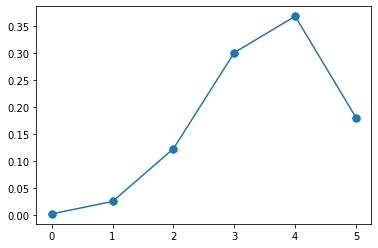

In [ ]:
n, p = 5, 0.71

P_xi = lambda _k: math.comb(n, _k) * p ** _k * (1 - p) ** (n - _k)
x = list(range(n + 1))
y = [P_xi(x_i) for x_i in x]

plt.plot(x, y, '.-', markersize=15)
plt.show()

0 : 0.002028
1 : 0.024981
2 : 0.122413
3 : 0.301518
4 : 0.368744
5 : 0.180316


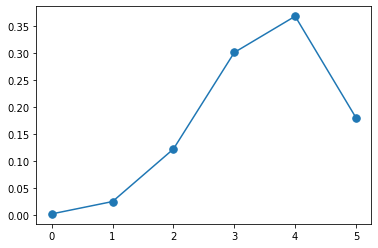

In [ ]:
t = 1000000

experiment = np.array([np.random.choice([0, 1], t, p=[1 - p, p]) for _ in range(n)])
experiment.sum(axis=0)

x, y = list(range(0, n + 1)), list()

for i in x:
    count_i = np.array(experiment.sum(axis=0) == i).sum()
    y.append(count_i / t)
    print(f'{i} : {count_i / t}')

plt.plot(x, y, '.-', markersize=15)
plt.show()

### Задача

---

Журналисту необходимо взять интервью у одного из участников конференции по безопасности персональных данных. Вероятность того, что очередной участник конференции согласится на интервью, составляет 0.15. Составить таблицу распределения количества опрошенных до первого согласия (до 9 человек) и определить тип распределения: геометрическое или биномиальное.

---

$$\mathbb P(\xi=k) = p \cdot (1 - p)^{k - 1}$$

---

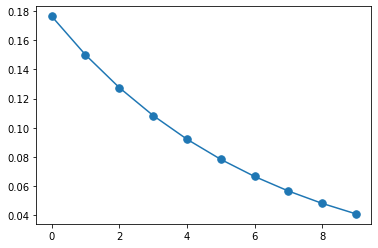

In [ ]:
n, p = 9, 0.15

P_xi = lambda _k: p * (1 - p) ** (_k - 1)
x = list(range(n + 1))
y = [P_xi(x_i) for x_i in x]

plt.plot(x, y, '.-', markersize=15)
plt.show()

0 : 0.18518
1 : 0.1578
2 : 0.13495
3 : 0.1151
4 : 0.09799
5 : 0.08371
6 : 0.06915
7 : 0.06141
8 : 0.05098
9 : 0.04373


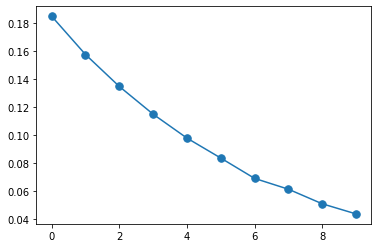

In [ ]:
t = 100000

experiment = []
for _ in range(t):
    k = 0
    while True:
        if np.random.choice([0, 1], p=[1 - p, p]) == 1:
            break
        k += 1
        if k > 9:
            k = 0
    experiment.append(k)

experiment = np.array(experiment)

x, y = list(range(0, n + 1)), list()

for i in x:
    count_i = np.array(experiment == i).sum()
    y.append(count_i / t)
    print(f'{i} : {count_i / t}')

plt.plot(x, y, '.-', markersize=15)
plt.show()

### Задача.

---

Распределение абсолютно непрерывной случайной величины задано функцией плотности вероятности $f_\xi(x)$:

$$
f_{\xi}(x) = \begin{cases}
  0,\quad & x \notin (0, a]
   \\
   e^{3x},\quad & x \in (0, a]
\end{cases}
$$

Найти неизвестный параметр $a > 0$ и составить функцию распределения $F_\xi(x)$.

---

Необходимо, чтобы $\int\limits_{-\infty}^{+\infty} e^{3x}dx=\int\limits_0^a e^{3x}dx=\frac 1 3 e^{3x}\bigg|_{0}^{a}=\frac 1 3 e^{3a}-\frac 1 3=1$. Получается, что $a=\dfrac{\operatorname{ln}4}{3}$. Тогда функция распределения равна:

$$
F_{\xi}(x) = \begin{cases}
  0,\quad & x \leq 0
   \\
   \frac{e^{3x}}{3} - \frac{1}{3},\quad & 0< x\leq \frac{\ln{4}}{3}
   \\
   1,\quad & x > \frac{\ln4}{3}
\end{cases}
$$

---

In [ ]:
x, a = sympy.Symbol('x'), sympy.Symbol('a')
solutions = sympy.solvers.solve(sympy.Integral(sympy.exp(3 * x), (x, 0, a)).doit() - 1, a)
sympy.Integral(sympy.exp(3 * x), (x, 0, a)).doit(), solutions

(exp(3*a)/3 - 1/3,
 [log(2**(2/3)) - 2*I*pi/3, log(2**(2/3)) + 2*I*pi/3, log(2**(2/3))])

Важно понимать, что на реальное значение параметра $a$ может претендовать только последнее значение.

### Задача.

---

Длительность одного заезда на аттракционе «американские горки» составляет 5 минут. Гость парка аттракционов подходит к платформе, где останавливается тележка (для высадки/посадки гостей), в случайный момент времени. Определить вероятность, что ожидание составит:

1. Менее 2 минут.
2. Более 4 минут.
3. От 2 до 4 минут.

---

Распределение равномерное, поэтому если $\xi$ — случайная величина, показывающая длительность ожидания, то:

1. $\mathbb P(\xi<2)=\frac 2 5$
2. $\mathbb P(\xi>4)=\frac{(5 - 4)} 5=\frac 1 5$
3. $\mathbb P(2 < \xi < 4) = 1 - (\mathbb P(\xi < 2) + \mathbb P(\xi > 4))=\frac 2 5$


In [ ]:
t = 10000000
experiment = np.random.uniform(0, 5, t)
experiment[experiment < 2].size / t, experiment[experiment > 4].size / t, experiment[
    (2 < experiment) & (experiment < 4)].size / t

(0.3998742, 0.2001104, 0.4000154)

### Задача.

---

Распределение случайной величины $\xi$ задано следующей функцией плотности вероятности:

$$
f_{\xi}(x) = \begin{cases}
  0, & x< 0
   \\
   3e^{-3x}, & x \geq 0
\end{cases}
$$

Составить функцию распределения $F_\xi(x)$ этой случайной величины, найти $\mathbb P(|\xi+1|\geq 3)$ и узнать тип распределения.

---

$$
F_{\xi}(x) = \int\limits_{-\infty}^{0} f_{\xi}(t)dt + \int\limits_{0}^{x} f_{\xi}(t)dt = 0 + \int\limits_{0}^{x}  3e^{-3t}dt = e^{-3t}\bigg|_{x}^{0} = 1 - e^{-3x}.
$$

$$
F_\xi(x) = \begin{cases}
0,\quad x<0\\
1-e^{-3x},\quad x\geq 0
\end{cases}
$$

$$
\mathbb P(|\xi+1|\geq 3) = 1 - F_\xi(2) + F_\xi(-4) = 1 - F_\xi(2) = e^{-6}.
$$
---

In [ ]:
x_0, x = sympy.Symbol('x_0'), sympy.Symbol('x')
sympy.Integral(3 * sympy.exp(-3 * x), (x, 0, x_0)).doit()

1 - exp(-3*x_0)

In [ ]:
sympy.Integral(3 * sympy.exp(-3 * x), (x, 2, math.inf)).doit()

exp(-6)

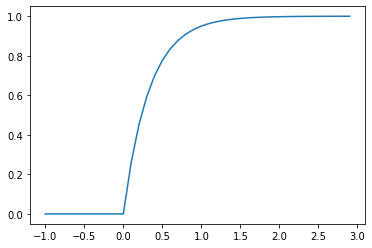

In [ ]:
x_left, x_right = np.arange(-1, 0, 0.1), np.arange(0, 3, 0.1)
y = np.concatenate((0 * x_left, 1 - np.exp(-3 * x_right)))
x = np.concatenate((x_left, x_right))

plt.plot(x, y)
plt.show()

### Задача.

---

Случайная величина $\xi$ распределена по нормальному закону с параметрами $a=2.5$, $\sigma=2$. Определить $P(|\xi|\leq 3)$.

---

$$
\mathsf{P}(|\xi|\leq 3) = \mathsf{P}(-3 \leq \xi \leq 3) = \Phi_{0,1}\left( \frac{3 - 2.5}{2} \right) - \Phi_{0,1}\left( \frac{-3 - 2.5}{2} \right) =\Phi_{0,1}\left( 0.25 \right) - \Phi_{0,1}\left( -2.75 \right) \approx 0.596.
$$

---


In [ ]:
x = sympy.Symbol('x')
float(sympy.Integral(
    1 / sympy.sqrt(2 * sympy.pi) * sympy.exp(-x ** 2 / 2),
    (x, (-3 - 2.5) / 2, (3 - 2.5) / 2)
).doit())

0.5957265624478691

---

# Многомерные распределения

---

### Задача.

---

Двумерная непрерывная случайная величина распределена равномерно в области $K: x\in[1,3], y \in [2,4]$.

Составить функцию плотности $f_{\vec{\xi}}(x,y)$.

Составить одномерную функцию плотности $f_{\xi_1}(x)$.

Составить одномерную функцию плотности $f_{\xi_2}(x)$.

Найти $\mathbb P(2 < x < 3, \ \ 1\leq y \leq 3)$.

Выяснить, зависимы ли величины $\xi_1$ и $\xi_2$ или нет.

---

$$
f_{\vec{\xi}}(x,y) = \begin{cases}
  0, & (x, y) \notin K
   \\
   \frac{1}{4},  & (x, y)\in K.
\end{cases}
$$

$$
f_{\xi_{1}}(x) = \int\limits_{-\infty}^{+\infty}f(x,y)dy = \frac{1}{4}\int\limits^4_2 dy = \frac{1}{2}
$$

$$
f_{\xi_{2}}(y) = \int\limits_{-\infty}^{+\infty}f(x,y)dx = \frac{1}{4}\int\limits^3_1 dx = \frac{1}{2}
$$

Вероятность $\mathbb{P}(2< x< 3, 1 \leq y \leq 3)$ вычислить можно алгебраически:

$$
\mathbb{P}(2< x< 3, 1 \leq y \leq 3) = \int\limits^3_2 \int\limits^3_1 f_{\vec{\xi}}(x,y) dxdy  =\int\limits^3_2 \int\limits^2_1 0 dxdy + \int\limits^3_2 \int\limits^3_2 \frac{1}{4} dxdy = \frac{1}{4}
$$

Или геометрически:

![](https://cdn2.openedu.ru/assets/courseware/v1/9eee3ca68b8b8409b0931014d18ddf35/asset-v1:ITMOUniversity+APPSTAT+fall_2022_ITMO+type@asset+block/4_rectangle.png)

---

In [ ]:
x, y, c = sympy.Symbol('x'), sympy.Symbol('y'), sympy.Symbol('c')

sympy.solvers.solve(
    sympy.Integral(
        sympy.Integral(
            c, (x, 1, 3)
        ).doit(),
        (y, 2, 4)
    ).doit() - 1,
    c
)

[1/4]

In [ ]:
sympy.Integral(1 / 4, (x, 1, 3)).doit(), sympy.Integral(1 / 4, (y, 2, 4)).doit()

(0.500000000000000, 0.500000000000000)

In [ ]:
sympy.Integral(
    sympy.Integral(
        1 / 4, (x, 2, 3)
    ).doit(),
    (y, 2, 3)
).doit()

0.250000000000000

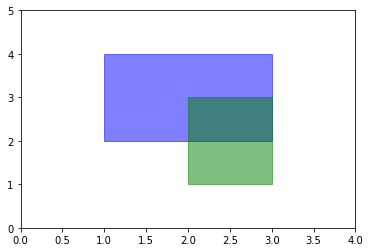

In [ ]:
from matplotlib.patches import Rectangle

_, ax = plt.subplots()

plt.xlim(0, 4)
plt.ylim(0, 5)

ax.add_patch(Rectangle((1, 2), 2, 2, color='blue', alpha=0.5))
ax.add_patch(Rectangle((2, 1), 1, 2, color='green', alpha=0.5))

plt.show()

### Задача.

---

Плотность двумерной абсолютно непрерывной случайной величины имеет вид:

$$
f_{\vec{\xi}}(x,y) = \begin{cases}
  0,\quad & (x, y) \notin K
   \\
   cxy,\quad & (x, y) \in K,
\end{cases}
$$

Где $K$ — область, ограниченная треугольником, образованным пересечением прямых $x=0, \ \ y=0, \ \ y=3 - 1.5 x$.

Составить функцию плотности $f_{\vec{\xi}}(x,y)$.

Составить одномерную функцию плотности $f_{\xi_1}(x)$.

Составить одномерную функцию плотности $f_{\xi_2}(x)$.

Составить функцию распределения $F_{\vec{\xi}}(x, y)$.

---

Найдем параметр $c$:

$$
\int\limits_{0}^2\int\limits_{0}^{3-1.5 x} f_{\vec{\xi}}(x,y) dxdy = c\cdot \frac 3 2\quad\Rightarrow\quad c=\frac 2 3
$$

$$
f_{\vec{\xi}}(x,y) = \begin{cases}
  0,\quad & (x, y) \notin K
   \\
   \frac 2 3 \cdot xy,\quad & (x, y) \in K,
\end{cases}
$$

А теперь маргинальные распределения:

$$
f_{\xi_1}(x) = \int\limits_{-\infty}^{+\infty}f_{\xi}(x,y)dy  \int\limits_0^{3-1.5x}\frac{2}{3}xydy = 3x-3x^2+\frac{3}{4}x^3,
$$
$$
f_{\xi_1}(x) = \begin{cases}
  0, &  x \notin (0,2]
   \\
   3x-3x^2+\frac{3}{4}x^3, &  x\in (0,2].
\end{cases}
$$

$$
f_{\xi_2}(y) = \int\limits_0^{2-\frac{2}{3}y}\frac{2}{3}xydx = \frac{4}{3}y - \frac{8}{9}y^2+\frac{4}{27}y^3,
$$
$$
f_{\xi_2}(y) = \begin{cases}
  0, &  y \notin (0,3]
   \\
   \frac{4}{3}y - \frac{8}{9}y^2+\frac{4}{27}y^3, &  y\in (0,3].
\end{cases}
$$

И $f_{\vec{\xi}}(x,y) \neq f_{\xi_1}(x)\cdot f_{\xi_2}(y)$, поэтому величины $\xi_1$ и $\xi_2$ зависимы.

![](https://cdn2.openedu.ru/assets/courseware/v1/4af35be8303814412e8506875c8b66cd/asset-v1:ITMOUniversity+APPSTAT+fall_2022_ITMO+type@asset+block/4_triangle.png)

1. Если $x<0,\ \ y < 0$, то $f_{\vec{\xi}}=0$ и $F_{\vec{\xi}}=0$.
2. Для $0<x\leq 2, \ \ 0 < y \leq 3 - 1.5 x$:

$$
F_{\vec{\xi}}(x,y) = \int\limits^{x}_{-\infty} \int\limits^{y}_{-\infty} f_{\vec{\xi}}(x,y) dxdy = \int\limits^{x}_{0} \int\limits^{y}_{0} \frac{2}{3}xy dxdy = \frac{x^2y^2}{6}
$$
3. Для $0 < x \leq 2,\ \ y > 3 - 1.5x$:

$$F_{\vec{\xi}}(x,y)=  \int\limits^{x}_{-\infty} \int\limits^{y}_{-\infty} f_{\vec{\xi}}(x,y) dxdy = \int\limits^{x}_{-\infty} \int\limits^{+\infty}_{-\infty} f_{\vec{\xi}}(x,y) dxdy =	\int\limits^{x}_{-\infty}dx\int\limits^{+\infty}_{-\infty}f_{\vec{\xi}}(x,y) dy =$$

$$= \int\limits_{-\infty}^x f_{\xi_1}(x) dx = \int\limits_{0}^x  (3x-3x^2+\frac{3}{4}x^3) dx = \frac{3}{2}x^2 - x^3 + \frac{3}{16}x^4
$$
4. Для $x > 2 - \frac 2 3 y,\ \ 0 < y \leq 3$:
$$
F_{\vec{\xi}}(x,y)= \int\limits_{-\infty}^y f_{\xi_2}(y) dy = \int\limits_{0}^y  (\frac{4}{3}y - \frac{8}{9}y^2+\frac{4}{27}y^3) dy = \frac{2}{3}y^2 - \frac{8}{27}y^3 + \frac{1}{27}y^4
$$
5. А если $x > 2,\ \ y > 3$, то $f_{\vec{\xi}}=1$ и $F_{\vec{\xi}}=1$.

Итого:

$$
F_{\vec{\xi}}(x,y) = \begin{cases}
  0,\quad &  x< 0  \  \text{или} \  y< 0
   \\
   \frac{x^2y^2}{6},\quad &  0< x\leq2 ,0< y\leq 3-1.5x
   \\
   \frac{3}{2}x^2 - x^3 + \frac{3}{16}x^4,\quad &  0< x\leq2 ,y> 3-1.5x
   \\
   \frac{2}{3}y^2 - \frac{8}{27}y^3 + \frac{1}{27}y^4,\quad  &  x > 2 - \frac{2}{3}y ,0< y\leq 3
   \\
   1,\quad &  x>2, y>3.
\end{cases}
$$

---


In [49]:
# Находим С
x, y, c = sympy.Symbol('x'), sympy.Symbol('y'), sympy.Symbol('c')

sympy.solvers.solve(
    sympy.Integral(
        sympy.Integral(
            c * x * y,
            (y, 0, 3 - 1.5 * x)
        ).doit(),
        (x, 0, 2)
    ).doit() - 1,
    c
)

[0.666666666666667]

In [50]:
# Для  Y от 0 до 3 - 1.5 * x 
sympy.Integral(2/3 * x * y, (y, 0, 3 - 1.5 * x)).doit()

3.0*x*(1 - 0.5*x)**2

In [51]:
# берем инт по Х (х выразили через Y)
sympy.Integral(2/3 * x * y, (x, 0, 2 - 2/3 * y)).doit()

1.33333333333333*y*(1 - 0.333333333333333*y)**2

$0<x\leq 2, \ \ 0 < y \leq 3 - 1.5 x$:

In [52]:
sympy.Integral(
    sympy.Integral(
        2/3 * x * y,
        (y, 0, y)
    ).doit(),
    (x, 0, x)
).doit()

0.166666666666667*x**2*y**2

$0 < x \leq 2,\ \ y > 3 - 1.5x$:

In [53]:
sympy.Integral(
    3 * x * (1 - 0.5 * x) ** 2,
    (x, 0, x)
).doit(),

(0.1875*x**4 - 1.0*x**3 + 1.5*x**2,)

$x > 2 - \frac 2 3 y,\ \ 0 < y \leq 3$:

In [54]:
sympy.Integral(
    4/3 * y * (1 - 1/3 * y) ** 2,
    (y, 0, y)
).doit()

0.037037037037037*y**4 - 0.296296296296296*y**3 + 0.666666666666667*y**2